In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from toolbox.auxiliary_functions import SRT_simulation, D_CODE_simulation, set_param_freq

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'HillODE' # help="name of the ode", type=str
ode_param = '2.8,1,1,0.1' # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # help="sampling frequency", type=float, default=10
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
seed = 100 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 2
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)
T = ode.T

(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']


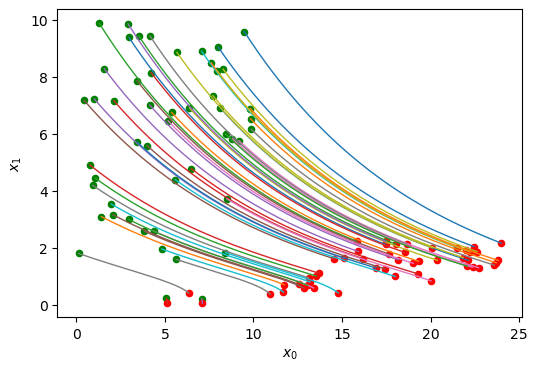

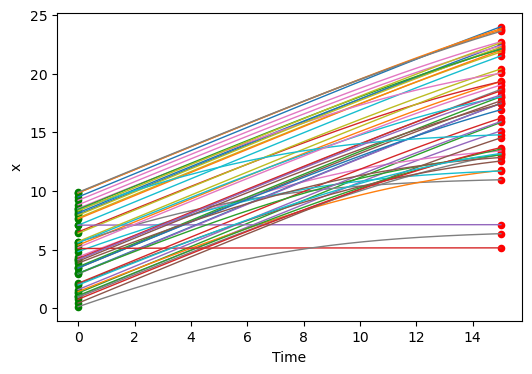

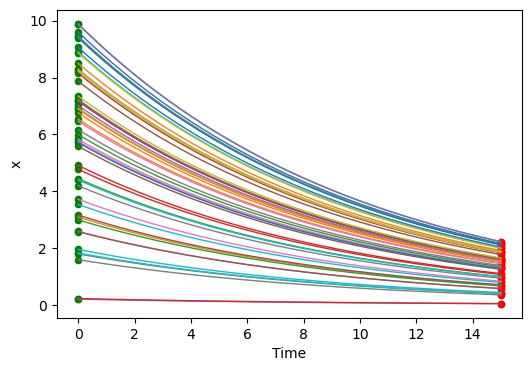

In [14]:
# Generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, 0, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], ode.T)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], ode.T)

Running with: ode_name=HillODE, ode_param=[2.8, 1.0, 1.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Dataset shape:  (151, 50, 2)


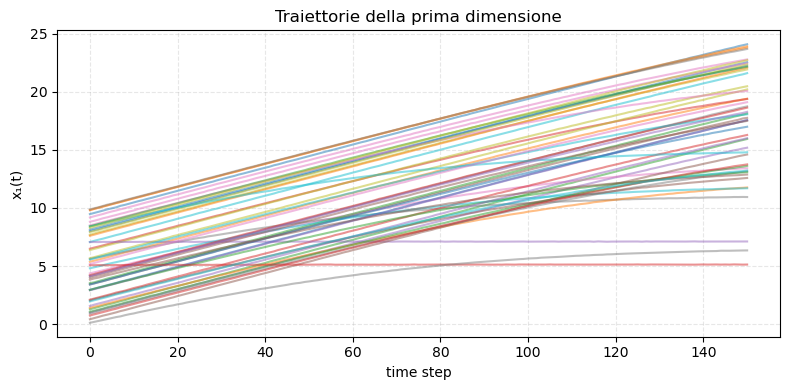

Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.69      2.82061e+17       12         0.147742         0.147167      4.25m


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)


   1     8.97      4.87425e+06       11        0.0497993        0.0518623      4.70m
   2     3.85      2.82651e+06       11        0.0495363         0.054229      3.42m
   3     3.36           617390       11        0.0487238        0.0615424      2.70m
   4     3.74           114241       11         0.034643        0.0292777      2.92m
   5     5.61           678221        9        0.0255443        0.0252276      2.57m
   6     8.76          66932.8       17        0.0131468        0.0117742      2.57m
   7     9.46           135634       17         0.014004        0.0132284      2.58m
   8     8.99           111632        9        0.0145642        0.0218633      2.11m
   9     8.86           106740        9       0.00672687       0.00626563      2.25m
  10     8.73           590628        9       0.00642576       0.00657259      1.90m
  11     8.77           126006        9       0.00430847        0.0043749      1.58m
  12     8.79           133199        9       0.00646107       0.

In [3]:
# running SR-T:
building_blocks_lambda0, function_names0 = SRT_simulation(ode_name, ode_param, 0, freq, n_sample, noise_ratio, alg='tv', seed=seed, n_seed=n_seed, T=15)
# building_blocks_lambda1, function_names1 = SRT_simulation(ode_name, ode_param, 1, freq, n_sample, noise_ratio, alg='tv', seed=seed, n_seed=n_seed, T=T)
None
# Fin qui giusto con [0,10] [0,10]

Running with: ode_name=HillODE, ode_param=[2.8, 1.0, 1.0, 0.1], x_id=0, freq=10, n_sample=50, noise_sigma=0.01, seed=100, n_seed=1
Dataset shape:  (301, 50, 2)
Functions set:  {'neg': 1, 'mul': 1, 'pow': 1, 'add': 1, 'div': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.69      6.69184e+41       12          12.2732          21.1027      3.16m
   1     9.73      1.58754e+20       11          6.22012         0.765302      3.88m
   2     5.22      3.67755e+20        7          2.53358          2.50624      2.60m
 
promising programs:
div(mul(1.405, X1), add(1.677, X1))
div(mul(1.405, X1), add(1.677, X1))
div(mul(1.405, X1), add(1.677, X1))
div(mul(1.405, X1), add(1.677, X1))
div(mul(1.405, X1), add(1.677, X1))
div(X0, add(div(add(1.894, X0), pow(X1, div(X0, 3.287))), X0))
div(X0

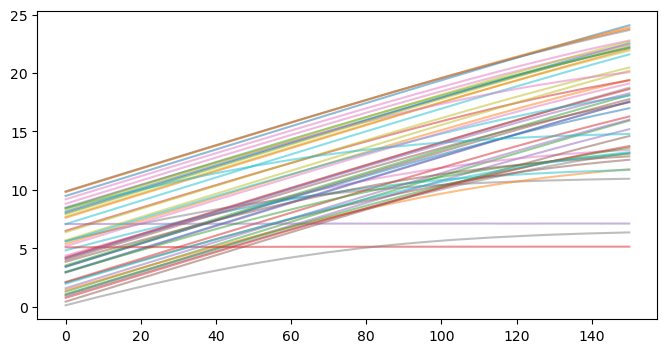

In [12]:
# running D-CODE
building_blocks_lambda0, function_names0 = D_CODE_simulation(ode_name, ode_param, 0, freq, n_sample, noise_ratio, seed=seed, n_seed=n_seed, T=T)
# building_blocks_lambda1, function_names1 = D_CODE_simulation(ode_name, ode_param, 1, freq, n_sample, noise_ratio, seed=seed, n_seed=n_seed, T=T)